In [ ]:
using NLsolve
using Plots

In [21]:
function euler_step(current_value, time, step_size, derivative_function)
    return current_value + step_size * derivative_function(time, current_value)
end

function backward_euler_step(current_value, time, step_size, derivative_function)
    function equation_to_solve!(F, x)
        F[1] = x[1] - current_value - step_size * derivative_function(time + step_size, x[1])
    end
    return nlsolve(equation_to_solve!, [current_value]).zero[1]
end

function euler_method(method, steps, derivative_function, initial_value, begin_time, end_time)
    step_size = (end_time - begin_time) / steps
    time_values = begin_time+step_size:step_size:end_time
    function_values = zeros(steps)
    current_value = initial_value
    for (index, time) in enumerate(time_values)
        if method == "mixed"
            if rand(Bool)
                current_value = euler_step(current_value, time, step_size, derivative_function)
            else
                current_value = backward_euler_step(current_value, time, step_size, derivative_function)
            end
        elseif method == "backward"
            current_value = backward_euler_step(current_value, time, step_size, derivative_function)
        else
            current_value = euler_step(current_value, time, step_size, derivative_function)
        end
        function_values[index] = current_value
    end
    return time_values, function_values
end

euler_method (generic function with 3 methods)

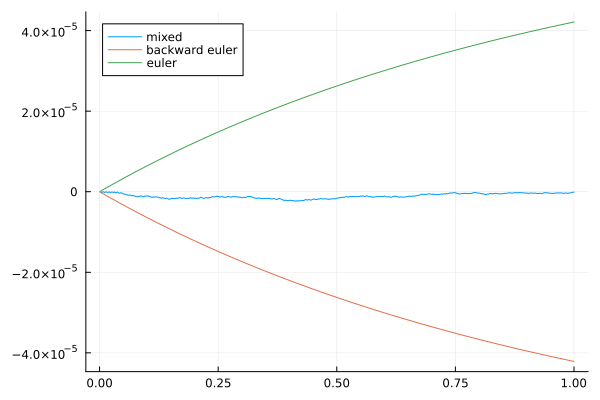

In [25]:
steps = 1000
initial_value = 1.0
begin_time = 0.0
end_time = 1.0

derivative_function(t,y) = exp(-y);  solution_function(t) = log(t + ℯ)
# derivative_function(t,y) = -y;  solution_function(t) = exp(-t)

time_values1, function_values1 = euler_method("mixed", steps, derivative_function, initial_value, begin_time, end_time)
time_values2, function_values2 = euler_method("backward", steps, derivative_function, initial_value, begin_time, end_time)
time_values3, function_values3 = euler_method("euler", steps, derivative_function, initial_value, begin_time, end_time)

# plot(time_values1, abs.(function_values1 - solution_function.(time_values1)) ./ abs.(function_values2 - solution_function.(time_values2)), label="mixed")
# plot!(time_values1, abs.(function_values3 - solution_function.(time_values1)) ./ abs.(function_values2 - solution_function.(time_values2)), label="euler")

plot(time_values2, (function_values1 - solution_function.(time_values2)), label="mixed")
plot!(time_values2, (function_values2 - solution_function.(time_values2)), label="backward euler")
plot!(time_values3, (function_values3 - solution_function.(time_values2)), label="euler")